#### Pandas

Pandas是基于Numpy的专业数据分析工具，可以灵活高效的处理各种数据集，也是我们后期分析案例的神器。它提供了两种类型的数据结构，分别是DataFrame和Series，我们可以简单的把DataFrame理解为Excel里面的一张表，而Series就是表中的某一列，后面学习和用到的所有Pandas操作，都是基于这些表和列进行的操作。

这里有一点需要强调，Pandas和Excel、SQL相比，只是调用和处理数据的方式变了，核心都是对源数据进行一系列的处理，在正式处理之前，更重要的是谋定而后动，明确分析的意义，理清分析思路之后再处理和分析数据，往往事半功倍。

参考：
官方文档 https://pandas.pydata.org/pandas-docs/stable/getting_started/index.html

#### 创建、读取和存储

在Pandas中我们想要构造一张表，第一步一定是先导入我们的库——import pandas as pd

构造DataFrame最常用的方式是**字典+列表**，语句很简单，先是字典外括，然后依次打出每一列标题及其对应的列值（此处一定要用列表），这里列的顺序并不重要：

In [1]:
import pandas as pd

df1 = pd.DataFrame({'Yes': [50, 21], 'No': [131, 2]})
df2 = pd.DataFrame({'Bob': ['I liked it.', 'It was awful.'], 'Sue': ['Pretty good.', 'Bland.']})
df2

,Bob,Sue
0,I liked it.,Pretty good.
1,It was awful.,Bland.


我们使用pd.DataFrame构造函数来生成这些DataFrame对象。创建新对象的语法是初始化一个字典，其键是列名（本例中为Bob和Sue），其值是条目列表。 这是构建新DataFrame的标准方法，也是你最容易遇到的方法。

字典列表的构造函数为列标签分配值，但只使用0（0,1,2,3，...）的递增计数作为行标签。 有时候这没关系，但我们经常会想要自己分配这些行标签。

DataFrame中使用的行标签列表称为索引。 我们可以在构造函数中使用索引参数为其赋值：


In [2]:
pd.DataFrame({'Bob': ['I liked it.', 'It was awful.'], 
              'Sue': ['Pretty good.', 'Bland.']},
             index=['Product A', 'Product B'])

,Bob,Sue
Product A,I liked it.,Pretty good.
Product B,It was awful.,Bland.


相比之下，Series是一系列数据值。 如果DataFrame是表，则Series是列表。 事实上，你可以创建一个Series只有一个列表：

In [3]:
p = pd.Series([1, 2, 3, 4, 5])
p

0    1
1    2
2    3
3    4
4    5
dtype: int64

Series本质上是DataFrame的单个列。 因此，你可以使用索引参数以与之前相同的方式为Series分配列值。 但是，Series没有列名，它只有一个总名称：

In [6]:
k = pd.Series([30, 35, 40], index=['2015 Sales', '2016 Sales', '2017 Sales'], name='Product A')
k.values.tolist()


[30, 35, 40]

Series和DataFrame密切相关。 将DataFrame视为实际上只是一堆Series**粘合在一起**是有帮助的。

#### 读取数据

能够手动创建DataFrame和Series非常方便。 但是，在大多数情况下，我们实际上不会手动创建自己的数据，我们将使用已经存在的数据。

数据可以以多种不同的形式和格式存储。 到目前为止，其中最基本的是简单的**CSV文件**，以及**xls文件**。

*你可以在本repo中下载课件中提到的文件，或者使用Github Desktop来下载所有的文件到本地（推荐）*

In [9]:
df = pd.read_csv('stock_data.csv', index_col=0)
#df = pd.read_excel("stock_data.xls", sheet_name='price')
df

,ts_code,trade_date,open,high,low,close,pre_close,change,pct_chg,vol,amount
0,002747.SZ,20200724,16.80,16.81,15.56,16.20,16.51,-0.31,-1.8776,285487.23,460908.718
1,002747.SZ,20200723,17.80,18.07,16.24,16.51,17.95,-1.44,-8.0223,332693.07,561431.842
2,002747.SZ,20200722,17.12,18.18,16.90,17.95,17.21,0.74,4.2998,184201.74,325956.565
3,002747.SZ,20200721,17.20,17.87,16.77,17.21,16.97,0.24,1.4143,226621.76,390465.486
4,002747.SZ,20200720,15.80,16.97,15.50,16.97,15.43,1.54,9.9806,320102.62,530137.992
...,...,...,...,...,...,...,...,...,...,...,...
732,002747.SZ,20170707,11.36,11.43,11.22,11.28,11.43,-0.15,-1.3100,69776.46,78795.099
733,002747.SZ,20170706,11.49,11.53,11.36,11.43,11.53,-0.10,-0.8700,51529.62,58924.662
734,002747.SZ,20170705,11.52,11.65,11.47,11.53,11.56,-0.03,-0.2600,50503.45,58339.668
735,002747.SZ,20170704,11.50,11.68,11.45,11.56,11.50,0.06,0.5200,50820.01,58857.307


#### 存储数据

将数据写入文件通常比从一个文件中读取数据更容易，因为pandas会为你处理转换的麻烦。

我们将再次使用CSV文件。 read_csv（读取我们的数据）的反义词是to_csv，写入它。 使用CSV文件很简单。 要写回Excel文件，需要再次使用to_excel和sheet_name。

In [10]:
df.to_csv('stock_data_head2.csv')
#df.to_excel('stock_data_head.xls', sheet_name='price')

**统计信息概览**

快速计算数值型数据的关键统计指标，像平均数、中位数、标准差等等

In [13]:
df.describe()

,trade_date,open,high,low,close,pre_close,change,pct_chg,vol,amount
count,7.370000e+02,737.000000,737.000000,737.000000,737.000000,737.000000,737.000000,737.000000,737.000000,737.000000
mean,2.018581e+07,11.002198,11.244084,10.789118,11.017123,11.010475,0.006649,0.093007,90858.378725,106162.360978
std,9.637208e+03,1.889141,1.976465,1.827325,1.908847,1.899236,0.343773,2.983851,70279.618800,96928.400735
min,2.017070e+07,7.770000,7.950000,7.750000,7.770000,7.770000,-1.440000,-10.018600,7829.000000,7891.632000
25%,2.018040e+07,9.360000,9.560000,9.210000,9.360000,9.360000,-0.170000,-1.530000,45415.130000,46596.916000
50%,2.019010e+07,10.890000,11.080000,10.610000,10.850000,10.850000,0.000000,0.000000,68256.230000,75595.631000
75%,2.019102e+07,12.280000,12.560000,12.020000,12.290000,12.280000,0.160000,1.414300,110826.680000,130335.838000
max,2.020072e+07,17.800000,18.180000,16.900000,17.950000,17.950000,1.540000,10.043700,543655.080000,814316.938000


**列的基本处理方式**

这里，我们采用SQL四大法宝的逻辑来简单梳理针对列的基本处理方式——增、删、选、改。

温馨提示：使用Pandas时，尽量避免用行或者EXCEL操作单元格的思维来处理数据，要逐渐养成一种列向思维，每一列是同宗同源。

**增**  增加一列，用df['新列名'] = 新列值的形式，在原数据基础上赋值即可

In [11]:
df['new_col'] = range(1, len(df)+1)
df.head()

,ts_code,trade_date,open,high,low,close,pre_close,change,pct_chg,vol,amount,new_col
0,002747.SZ,20200724,16.80,16.81,15.56,16.20,16.51,-0.31,-1.8776,285487.23,460908.718,1
1,002747.SZ,20200723,17.80,18.07,16.24,16.51,17.95,-1.44,-8.0223,332693.07,561431.842,2
2,002747.SZ,20200722,17.12,18.18,16.90,17.95,17.21,0.74,4.2998,184201.74,325956.565,3
3,002747.SZ,20200721,17.20,17.87,16.77,17.21,16.97,0.24,1.4143,226621.76,390465.486,4
4,002747.SZ,20200720,15.80,16.97,15.50,16.97,15.43,1.54,9.9806,320102.62,530137.992,5


**删**  我们用drop函数制定删除对应的列，axis = 1表示针对列的操作，inplace为True，则直接在源数据上进行修改，否则源数据会保持原样

In [ ]:
df.drop('new_col', axis = 1, inplace = True)

In [20]:
df

,ts_code,trade_date,open,high,low,close,pre_close,change,pct_chg,vol,amount
0,002747.SZ,20200724,16.80,16.81,15.56,16.20,16.51,-0.31,-1.8776,285487.23,460908.718
1,002747.SZ,20200723,17.80,18.07,16.24,16.51,17.95,-1.44,-8.0223,332693.07,561431.842
2,002747.SZ,20200722,17.12,18.18,16.90,17.95,17.21,0.74,4.2998,184201.74,325956.565
3,002747.SZ,20200721,17.20,17.87,16.77,17.21,16.97,0.24,1.4143,226621.76,390465.486
4,002747.SZ,20200720,15.80,16.97,15.50,16.97,15.43,1.54,9.9806,320102.62,530137.992
...,...,...,...,...,...,...,...,...,...,...,...
732,002747.SZ,20170707,11.36,11.43,11.22,11.28,11.43,-0.15,-1.3100,69776.46,78795.099
733,002747.SZ,20170706,11.49,11.53,11.36,11.43,11.53,-0.10,-0.8700,51529.62,58924.662
734,002747.SZ,20170705,11.52,11.65,11.47,11.53,11.56,-0.03,-0.2600,50503.45,58339.668
735,002747.SZ,20170704,11.50,11.68,11.45,11.56,11.50,0.06,0.5200,50820.01,58857.307


有人能帮我理解一下，在pandas、numpy、scipy三都当中axis参数的真实含义吗？

投票最高的答案揭示了问题的本质：

- 其实问题理解axis有问题，df.mean其实是在每一行上取所有列的均值，而不是保留每一列的均值。也许简单的来记就是axis=0代表往跨行（down)，而axis=1代表跨列（across)，作为方法动作的副词

![](assets/axis.jpg)

**选** 想要选取某一列怎么办？df['列名']即可

In [30]:
df['ts_code']
df[['open','high']]

,open,high
0,16.80,16.81
1,17.80,18.07
2,17.12,18.18
3,17.20,17.87
4,15.80,16.97
...,...,...
732,11.36,11.43
733,11.49,11.53
734,11.52,11.65
735,11.50,11.68


In [31]:
df['open'].head()

0    16.80
1    17.80
2    17.12
3    17.20
4    15.80
Name: open, dtype: float64

**改**  简单的更改：df['旧列名'] =  某个值或者某列值，就完成了对原列数值的修改

In [32]:
df['open'] = df['open'] + 100
df['open'].head()

0    116.80
1    117.80
2    117.12
3    117.20
4    115.80
Name: open, dtype: float64

**选（复杂索引）**  基于判断，输出布尔值，可以把这一列判断得到的值传入行参数位置，Pandas会默认返回结果为True的行（这里是索引从0到12的行），而丢掉结果为False的行

In [34]:
# 输出交易量大于平均交易量的数据
df['vol'] > df['vol'].mean()


0       True
1       True
2       True
3       True
4       True
       ...  
732    False
733    False
734    False
735    False
736    False
Name: vol, Length: 737, dtype: bool

In [15]:
df.loc[df['vol'] > df['vol'].mean(),:]
# iloc[3,5], ix

,ts_code,trade_date,open,high,low,close,pre_close,change,pct_chg,vol,amount
0,002747.SZ,20200724,16.80,16.81,15.56,16.20,16.51,-0.31,-1.8776,285487.23,460908.718
1,002747.SZ,20200723,17.80,18.07,16.24,16.51,17.95,-1.44,-8.0223,332693.07,561431.842
2,002747.SZ,20200722,17.12,18.18,16.90,17.95,17.21,0.74,4.2998,184201.74,325956.565
3,002747.SZ,20200721,17.20,17.87,16.77,17.21,16.97,0.24,1.4143,226621.76,390465.486
4,002747.SZ,20200720,15.80,16.97,15.50,16.97,15.43,1.54,9.9806,320102.62,530137.992
5,002747.SZ,20200717,14.86,15.80,14.80,15.43,14.87,0.56,3.7660,199292.16,305435.914
6,002747.SZ,20200716,14.95,16.10,14.83,14.87,15.23,-0.36,-2.3638,229290.80,353556.481
7,002747.SZ,20200715,15.40,15.60,14.80,15.23,15.20,0.03,0.1974,213356.58,323258.908
8,002747.SZ,20200714,15.21,16.16,14.68,15.20,15.32,-0.12,-0.7833,222269.86,340759.697
9,002747.SZ,20200713,14.97,15.43,14.75,15.32,15.12,0.20,1.3228,184452.45,278886.698


In [50]:
df.loc[df['pct_chg'] > 9.9,:] # 输出所有涨停的数据

,ts_code,trade_date,open,high,low,close,pre_close,change,pct_chg,vol,amount
4,002747.SZ,20200720,115.80,16.97,15.50,16.97,15.43,1.54,9.9806,320102.62,530137.992
11,002747.SZ,20200709,114.20,15.50,14.01,15.50,14.09,1.41,10.0071,267772.91,395199.486
26,002747.SZ,20200616,110.09,10.96,10.05,10.96,9.96,1.00,10.0402,177673.09,188478.610
115,002747.SZ,20200206,110.70,11.78,10.50,11.78,10.71,1.07,9.9907,256243.34,289982.744
129,002747.SZ,20200109,111.24,12.20,11.23,12.20,11.09,1.11,10.0090,204716.67,243318.704
210,002747.SZ,20190909,110.08,10.08,10.08,10.08,9.16,0.92,10.0437,7829.00,7891.632
329,002747.SZ,20190305,110.45,11.33,10.35,11.33,10.30,1.03,10.0000,201177.91,218377.167
542,002747.SZ,20180418,111.84,12.87,11.70,12.87,11.70,1.17,10.0000,258711.20,325185.223
686,002747.SZ,20170911,113.50,14.82,13.37,14.82,13.47,1.35,10.0200,490574.54,708201.434
691,002747.SZ,20170904,112.22,13.53,12.22,13.53,12.30,1.23,10.0000,312931.88,409827.692


In [53]:
sort_df = df.sort_values('close', ascending = False)
sort_df.head(10)

,ts_code,trade_date,open,high,low,close,pre_close,change,pct_chg,vol,amount
2,002747.SZ,20200722,117.12,18.18,16.90,17.95,17.21,0.74,4.2998,184201.74,325956.565
3,002747.SZ,20200721,117.20,17.87,16.77,17.21,16.97,0.24,1.4143,226621.76,390465.486
4,002747.SZ,20200720,115.80,16.97,15.50,16.97,15.43,1.54,9.9806,320102.62,530137.992
1,002747.SZ,20200723,117.80,18.07,16.24,16.51,17.95,-1.44,-8.0223,332693.07,561431.842
476,002747.SZ,20180724,115.18,16.42,15.18,16.35,15.25,1.10,7.2131,189263.20,301483.183
0,002747.SZ,20200724,116.80,16.81,15.56,16.20,16.51,-0.31,-1.8776,285487.23,460908.718
475,002747.SZ,20180725,116.16,16.26,15.81,15.90,16.35,-0.45,-2.7523,110424.70,176590.221
480,002747.SZ,20180718,115.60,16.15,15.37,15.69,15.52,0.17,1.1000,167440.56,263707.018
481,002747.SZ,20180717,114.60,15.75,14.60,15.52,14.70,0.82,5.5800,200447.43,307922.803
11,002747.SZ,20200709,114.20,15.50,14.01,15.50,14.09,1.41,10.0071,267772.91,395199.486


##### Apply 函数

1. 因为apply函数极其灵活高效，甚至是重新定义了pandas的灵活；
2. apply概念相对晦涩，需要结合具体案例去咀嚼和实践。

该函数经常和df.groupby一起使用, df.groupby() 函数返回的对象是一系列键值对，其中键是分组的字段值，值是该字段值下的数据表

In [21]:
df = pd.read_csv('multi_stock_data.csv')
grouped = df.groupby('ts_code')
#list(grouped)
for key, value in grouped:
    print(key)
    print(value)
    print("")

002350.SZ
     trade_date    ts_code  open  high   low  close  pre_close  change  \
552    20200729  002350.SZ  5.36  5.46  5.28   5.45       5.37    0.08   
553    20200728  002350.SZ  5.35  5.42  5.31   5.37       5.35    0.02   
554    20200727  002350.SZ  5.32  5.42  5.26   5.35       5.31    0.04   
555    20200724  002350.SZ  5.47  5.54  5.31   5.31       5.49   -0.18   
556    20200723  002350.SZ  5.48  5.49  5.32   5.49       5.51   -0.02   
..          ...        ...   ...   ...   ...    ...        ...     ...   
684    20200108  002350.SZ  6.20  6.52  6.01   6.05       5.93    0.12   
685    20200107  002350.SZ  5.75  6.07  5.75   5.93       5.72    0.21   
686    20200106  002350.SZ  5.65  5.74  5.65   5.72       5.69    0.03   
687    20200103  002350.SZ  5.66  5.74  5.65   5.69       5.67    0.02   
688    20200102  002350.SZ  5.65  5.68  5.60   5.67       5.60    0.07   

     pct_chg        vol      amount  
552   1.4898   42830.66   23080.964  
553   0.3738   37933.56  

转换成列表的形式后，可以看到，列表由5个元组组成，每个元组中，第一个元素是组别（这里是按照ts_code进行分组），第二个元素的是对应组别下的DataFrame.
总结来说，groupby的过程就是将原有的DataFrame按照groupby的字段（这里是ts_code），划分为若干个分组DataFrame，被分为多少个组就有多少个分组DataFrame。所以说，在groupby之后的一系列操作（如agg、apply等），均是基于子DataFrame的操作。理解了这点，也就基本摸清了Pandas中groupby操作的主要原理。

#### agg

**聚合操作**是groupby后非常常见的操作。聚合操作可以用来求和、均值、最大值、最小值等

In [35]:
mean_perform = df.groupby('ts_code')['close','open'].agg('mean')
mean_perform

,close,open
ts_code,,
002350.SZ,5.705693,5.683650
002660.SZ,9.363551,9.331304
002747.SZ,11.567029,11.520072
300685.SZ,75.799058,75.513623
603288.SH,115.442319,114.868841


In [41]:
some_perform = df.groupby('ts_code')['close','open'].agg({'close':'mean', 'open':'median'})
some_perform

,close,open
ts_code,,
002350.SZ,5.705693,5.660
002660.SZ,9.363551,9.280
002747.SZ,11.567029,11.080
300685.SZ,75.799058,73.995
603288.SH,115.442319,113.960


### transform
对transform而言，则会对每一条数据求得相应的结果，同一组内的样本会有相同的值，组内求完均值后会按照原索引的顺序返回结果

In [18]:
df_trans = df
df_trans['avg_close'] = df_trans.groupby('ts_code')['close'].transform('mean')
df_trans

,trade_date,ts_code,open,high,low,close,pre_close,change,pct_chg,vol,amount,avg_close
0,20200729,300685.SZ,76.88,80.50,75.22,79.53,76.20,3.33,4.3701,48231.39,378538.641,75.799058
1,20200728,300685.SZ,76.24,79.43,74.99,76.20,75.37,0.83,1.1012,45510.24,349243.253,75.799058
2,20200727,300685.SZ,71.84,75.99,71.09,75.37,70.99,4.38,6.1699,40116.85,298893.827,75.799058
3,20200724,300685.SZ,76.56,78.44,70.00,70.99,77.63,-6.64,-8.5534,45608.24,338125.593,75.799058
4,20200723,300685.SZ,76.70,80.80,76.41,77.63,76.90,0.73,0.9493,46867.92,367416.632,75.799058
5,20200722,300685.SZ,73.83,77.59,72.92,76.90,73.85,3.05,4.1300,36207.00,275623.622,75.799058
6,20200721,300685.SZ,70.61,74.50,69.50,73.85,70.77,3.08,4.3521,29076.21,212671.328,75.799058
7,20200720,300685.SZ,71.98,71.99,67.18,70.77,70.80,-0.03,-0.0424,34827.97,242427.871,75.799058
8,20200717,300685.SZ,69.76,72.13,68.64,70.80,69.37,1.43,2.0614,37857.31,265442.956,75.799058
9,20200716,300685.SZ,78.00,78.26,69.36,69.37,77.07,-7.70,-9.9909,51816.84,377971.397,75.799058


##### 场景一

我们拿到了一个数据集multi_stock_data.csv，里面包含着5个股票在2020年一段时间的日价格数据，我们想知道每个股票的最大涨幅（pct_chg）各自是多少？

In [22]:
df = pd.read_csv('multi_stock_data.csv')
best_perform = df.groupby('ts_code')['pct_chg'].apply(max)
best_perform

ts_code
002350.SZ    10.0372
002660.SZ     9.9886
002747.SZ    10.0402
300685.SZ     7.1859
603288.SH    10.0009
Name: pct_chg, dtype: float64

##### 场景二

我们拿到了5个股票在2020年一段时间的日价格数据，我们想知道每个股票的第二大交易发生在什么时间？

In [52]:
def get_second_largest(x):
    return x.iloc[1,:]

df_tmp = df.sort_values(by = ['ts_code', 'amount'], ascending = [True, True])
#df_tmp
df_new = df_tmp.groupby('ts_code')[['amount']].apply(get_second_largest).reset_index()
df_new


,ts_code,amount
0,002350.SZ,8886.508
1,002660.SZ,31304.942
2,002747.SZ,42285.525
3,300685.SZ,50858.522
4,603288.SH,239519.343


##### 作业

1. 了解如何使用下列的函数：去重（df.drop_duplicates）, 去空值（df.dropna），合并（df.merge, dr.concat），分组（df.groupby）

In [53]:
df

,trade_date,ts_code,open,high,low,close,pre_close,change,pct_chg,vol,amount
0,20200729,300685.SZ,76.88,80.50,75.22,79.53,76.20,3.33,4.3701,48231.39,378538.641
1,20200728,300685.SZ,76.24,79.43,74.99,76.20,75.37,0.83,1.1012,45510.24,349243.253
2,20200727,300685.SZ,71.84,75.99,71.09,75.37,70.99,4.38,6.1699,40116.85,298893.827
3,20200724,300685.SZ,76.56,78.44,70.00,70.99,77.63,-6.64,-8.5534,45608.24,338125.593
4,20200723,300685.SZ,76.70,80.80,76.41,77.63,76.90,0.73,0.9493,46867.92,367416.632
...,...,...,...,...,...,...,...,...,...,...,...
684,20200108,002350.SZ,6.20,6.52,6.01,6.05,5.93,0.12,2.0236,182015.88,111934.573
685,20200107,002350.SZ,5.75,6.07,5.75,5.93,5.72,0.21,3.6713,101464.57,59886.982
686,20200106,002350.SZ,5.65,5.74,5.65,5.72,5.69,0.03,0.5272,28396.10,16216.815
687,20200103,002350.SZ,5.66,5.74,5.65,5.69,5.67,0.02,0.3527,23224.10,13208.640


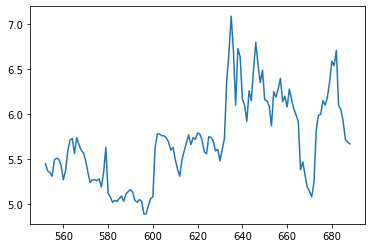

In [35]:
import matplotlib.pyplot as plt
df[df['ts_code'] == '002350.SZ']['close'].plot(y = 'close')
plt.show()
